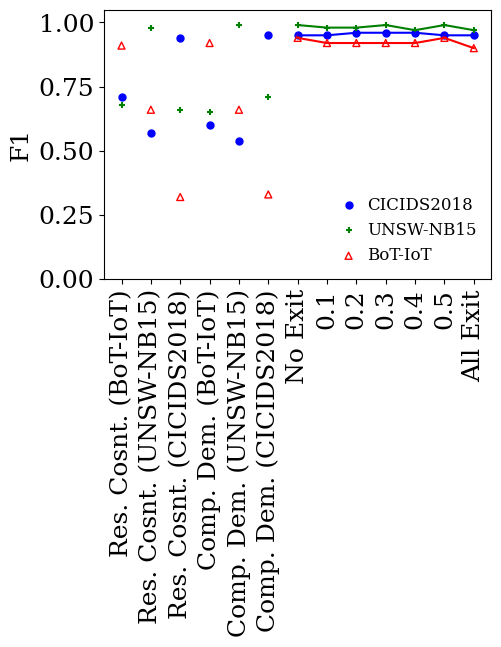

In [66]:
import matplotlib.pyplot as plt

labels = [
    "Res. Cosnt. (BoT-IoT)", "Res. Cosnt. (UNSW-NB15)", "Res. Cosnt. (CICIDS2018)",
    "Comp. Dem. (BoT-IoT)", "Comp. Dem. (UNSW-NB15)", "Comp. Dem. (CICIDS2018)",
    "No Exit",
    "0.1", "0.2", "0.3", "0.4", "0.5",
    "All Exit"
]

qtd_elementos = len(labels)

valores_lista_bot = [0.91, 0.66, 0.32, 0.92, 0.66, 0.33, 0.94, 0.92, 0.92, 0.92, 0.92, 0.94, 0.90]

valores_lista_unsw = [0.68, 0.98, 0.66, 0.65, 0.99, 0.71, 0.99, 0.98, 0.98, 0.99, 0.97, 0.99, 0.97]

valores_lista_cic = [0.71, 0.57, 0.94, 0.60, 0.54, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.95, 0.95]


x_indices = range(qtd_elementos)

plt.figure(figsize=(5, 3.5))

plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.rcParams.update({'font.size': 18})


plt.scatter(x_indices, valores_lista_cic, marker='o', color='blue', label='CICIDS2018', s=25)
plt.scatter(x_indices, valores_lista_unsw, marker='+', color='green', label='UNSW-NB15', s=25)
plt.scatter(x_indices, valores_lista_bot, marker='^', color='red', label='BoT-IoT', s=25, facecolors='none')

indices_linha = range(6, 13)

y_cic_linha = [valores_lista_cic[i] for i in indices_linha]
y_unsw_linha = [valores_lista_unsw[i] for i in indices_linha]
y_bot_linha = [valores_lista_bot[i] for i in indices_linha]

plt.plot(indices_linha, y_cic_linha, color='blue', linestyle='-')
plt.plot(indices_linha, y_unsw_linha, color='green', linestyle='-')
plt.plot(indices_linha, y_bot_linha, color='red', linestyle='-')

plt.xticks(ticks=x_indices, labels=labels, rotation=90)

plt.ylabel('F1')

plt.ylim(0, 1.05)
plt.grid(False)

plt.legend(frameon=False, loc='lower right', fontsize=12, handletextpad=0.1)
plt.savefig('graficos/compacuracia.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()

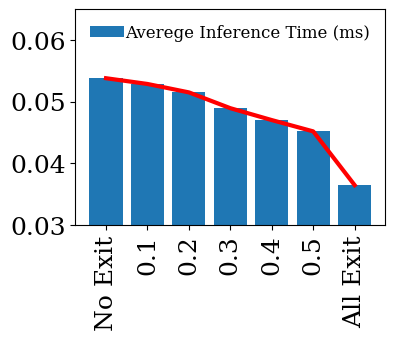

In [62]:
inf_time_ms_bot = [0.0570, 0.0570, 0.0553, 0.0506, 0.0495, 0.0491, 0.0366]
inf_time_ms_cic = [0.0521, 0.0521, 0.0513, 0.049, 0.04801, 0.0457, 0.0366]
inf_time_ms_unsw = [0.0524, 0.0496, 0.0480, 0.0473, 0.0436, 0.0408, 0.0362]

avg_inf_time_ms = [(a + b + c) / 3 for a, b, c in zip(inf_time_ms_bot, inf_time_ms_cic, inf_time_ms_unsw)]

labels_bar = [labels[i] for i in indices_linha]

x_indices = range(len(avg_inf_time_ms))

plt.figure(figsize=(4, 3.5*0.8))

plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.rcParams.update({'font.size': 18})

plt.bar(labels_bar, avg_inf_time_ms, label='Averege Inference Time (ms)')
plt.plot(x_indices, avg_inf_time_ms, color='red', linestyle='-', linewidth=3)

plt.xticks(rotation=90)

plt.ylim(0.03, 0.065)
plt.grid(False)

plt.legend(frameon=False, loc='upper right', fontsize=12, handletextpad=0.1)
plt.savefig('graficos/compprocessamento.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()